# Logan Sonley

## How close are we to %100 percent fully automated self driving cars

I am interested in the how car crashes compare between an autonomous vehicle and one that is driven by a person. Where and when they occur and differences in how they occur. I think that understanding the how autonomous driving can go wrong compared to when a person is driving sets a good benchmark to determine how far along we are in the process and how far away we are from fully self driving cars. 


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)

sns.set_theme(style="whitegrid",
              font_scale=1.3,)


In [8]:
dataset = pd.read_csv("../data/raw/Tesla_Deaths.csv")
dataset.head(n=10)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN
5,289.0,2022.0,12/18/2022,USA,CA,Tesla hit two other cars,1.0,-,1,-,...,-,-,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221219025408/ht...,https://web.archive.org/web/20221219025408/ht...,NaN,NaN,NaN,NaN,NaN
6,288.0,2022.0,12/17/2022,USA,CA,Tesla hits pedestrian on highway,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221220054727/ht...,https://web.archive.org/web/20221220054727/ht...,NaN,NaN,NaN,NaN,NaN
7,287.0,2022.0,12/11/2022,USA,CA,Tesla crashes into wall,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221213060612/ht...,NaN,Clarissa Lewis,NaN,NaN,NaN
8,286.0,2022.0,12/11/2022,USA,MO,Collision at intersection,1.0,-,-,1,...,-,-,https://www.ky3.com/2022/12/04/springfield-po...,https://www.ky3.com/2022/12/04/springfield-po...,https://www.ky3.com/2022/12/04/springfield-po...,NaN,Rita Deckard,NaN,NaN,NaN
9,285.0,2022.0,12/6/2022,Canada,-,"Tesla veers, collides with truck",1.0,1,-,-,...,-,-,https://web.archive.org/web/20221201065037/ht...,https://www.tvanouvelles.ca/2022/12/05/une-fe...,https://www.tvanouvelles.ca/2022/12/05/une-fe...,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset2 = pd.read_csv("../data/raw/US_car_crashes.csv")
dataset2.head(n=10)
            

,State,Atmospheric Condition,Crash Date,Fatalities in crash,Roadway,Age,Alcohol Results,Person Type,Drug Involvement,Race,Gender,Injury Severity,Crash Date.year,Crash Date.month,Crash Date.day-of-month,Crash Date.day-of-week
0,Alaska,Clear,2011-01-05,1,Rural-Principal Arterial-Interstate,27.0,0.00,Driver of a Motor Vehicle In-Transport,Yes,NaN,Male,Non-incapacitating Evident Injury (B),2011,1,5,3
1,Alaska,Clear,2011-01-05,1,Rural-Principal Arterial-Interstate,60.0,0.00,Driver of a Motor Vehicle In-Transport,No,White,Female,Fatal Injury (K),2011,1,5,3
2,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,24.0,NaN,Passenger of a Motor Vehicle In-Transport,Not Reported,NaN,Female,No Injury (O),2011,1,1,6
3,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,27.0,0.00,Driver of a Motor Vehicle In-Transport,No,NaN,Male,No Injury (O),2011,1,1,6
4,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,82.0,0.00,Pedestrian,No,Unknown,Female,Fatal Injury (K),2011,1,1,6
5,Arkansas,Clear,2011-01-02,1,Rural-Minor Arterial,40.0,0.00,Driver of a Motor Vehicle In-Transport,Not Reported,White,Male,Fatal Injury (K),2011,1,2,7
6,Colorado,Clear,2011-01-02,1,Rural-Local Road or Street,17.0,0.00,Driver of a Motor Vehicle In-Transport,No,White,Female,Fatal Injury (K),2011,1,2,7
7,Connecticut,Clear,2011-01-01,1,Urban-Local Road or Street,22.0,0.21,Driver of a Motor Vehicle In-Transport,Not Reported,White,Male,Fatal Injury (K),2011,1,1,6
8,Delaware,Cloudy,2011-01-04,1,Urban-Other Principal Arterial,4.0,NaN,Passenger of a Motor Vehicle In-Transport,Not Reported,NaN,Female,Non-incapacitating Evident Injury (B),2011,1,4,2
9,Delaware,Cloudy,2011-01-04,1,Urban-Other Principal Arterial,20.0,0.21,Driver of a Motor Vehicle In-Transport,Yes,White,Male,Fatal Injury (K),2011,1,4,2


# Milestone 3

## 1. Summary of dataset


In [12]:
import pandas as pd

# load the dataset
df = pd.read_csv("../data/raw/Tesla_Deaths.csv")

# generate summary statistics
summary = df.describe().T
print(summary)

              count         mean         std    min      25%     50%      75%  \
Case #        294.0   147.500000   85.014705    1.0    74.25   147.5   220.75   
Year          294.0  2013.850340  106.050207  202.0  2019.00  2021.0  2022.00   
 Deaths       299.0    10.284281  119.032014    1.0     1.00     1.0     1.00   
 Deceased 4     0.0          NaN         NaN    NaN      NaN     NaN      NaN   

                 max  
Case #         294.0  
Year          2022.0  
 Deaths       2013.0  
 Deceased 4      NaN  


In [34]:
import pandas as pd

# load the dataset
df = pd.read_csv("../data/raw/US_car_crashes.csv")

# generate summary statistics
summary = df.describe().T
print(summary)

                          count         mean        std     min     25%  \
Fatalities in crash      4999.0     1.138628   0.425039     1.0     1.0   
Age                      4929.0    38.608237  20.305162     0.0    22.0   
Alcohol Results          2293.0     0.058696   0.095707     0.0     0.0   
Crash Date.year          4999.0  2011.000000   0.000000  2011.0  2011.0   
Crash Date.month         4999.0     2.508702   2.201048     1.0     1.0   
Crash Date.day-of-month  4999.0    13.647930   8.802106     1.0     6.0   
Crash Date.day-of-week   4999.0     4.245849   2.011116     1.0     2.0   

                            50%      75%      max  
Fatalities in crash         1.0     1.00     5.00  
Age                        36.0    53.00    98.00  
Alcohol Results             0.0     0.12     0.65  
Crash Date.year          2011.0  2011.00  2011.00  
Crash Date.month            2.0     3.00    12.00  
Crash Date.day-of-month    13.0    21.00    31.00  
Crash Date.day-of-week      4.0    

## 2. Cleanup of data set

In [2]:
import pandas as pd
df = pd.read_csv('../data/raw/Tesla_Deaths.csv')

df.drop(['Date', 'Year', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ', 
         ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '], axis=1, inplace=True)
df.drop([294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306], axis=0, inplace=True)
dataset_new1 = df
print(dataset_new1)

     Case #  Country   State                         Description    Deaths   \
0     294.0      USA       CA    Tesla crashes into back of semi        1.0   
1     293.0   Canada        -                      Tesla crashes        1.0   
2     292.0      USA       WA   Tesla hits pole, catches on fire        1.0   
3     291.0      USA       GA            Tesla crashes and burns        1.0   
4     290.0   Canada        -      Tesla crashes into storefront        1.0   
..      ...       ...     ...                                 ...       ...   
289     5.0      USA      CA            Tesla kills motorcyclist        1.0   
290     4.0      USA      CA          Thief crashes stolen Tesla        1.0   
291     3.0      USA      CA         Tesla rear ends stopped car        3.0   
292     2.0      USA      CA                 Tesla kills cyclist        1.0   
293     1.0      USA      CA      Tesla veers into opposite lane        2.0   

     Tesla driver   Tesla occupant   Other vehicle 

In [3]:
import pandas as pd
df = pd.read_csv('../data/raw/Us_car_crashes.csv')

df.drop(['Atmospheric Condition', 'Race', 'Alcohol Results', 'Drug Involvement', 'Gender', 'Crash Date.year',
       'Crash Date.month', 'Crash Date.day-of-month',
       'Crash Date.day-of-week'], axis=1, inplace=True)
dataset_new2 = df
print(dataset_new2)

               State  Crash Date  Fatalities in crash  \
0             Alaska  2011-01-05                    1   
1             Alaska  2011-01-05                    1   
2            Arizona  2011-01-01                    1   
3            Arizona  2011-01-01                    1   
4            Arizona  2011-01-01                    1   
...              ...         ...                  ...   
4994      New Jersey  2011-01-31                    1   
4995        New York  2011-01-21                    1   
4996  North Carolina  2011-01-16                    1   
4997    North Dakota  2011-08-27                    1   
4998            Ohio  2011-03-05                    1   

                                  Roadway   Age  \
0     Rural-Principal Arterial-Interstate  27.0   
1     Rural-Principal Arterial-Interstate  60.0   
2          Urban-Other Principal Arterial  24.0   
3          Urban-Other Principal Arterial  27.0   
4          Urban-Other Principal Arterial  82.0   
...      

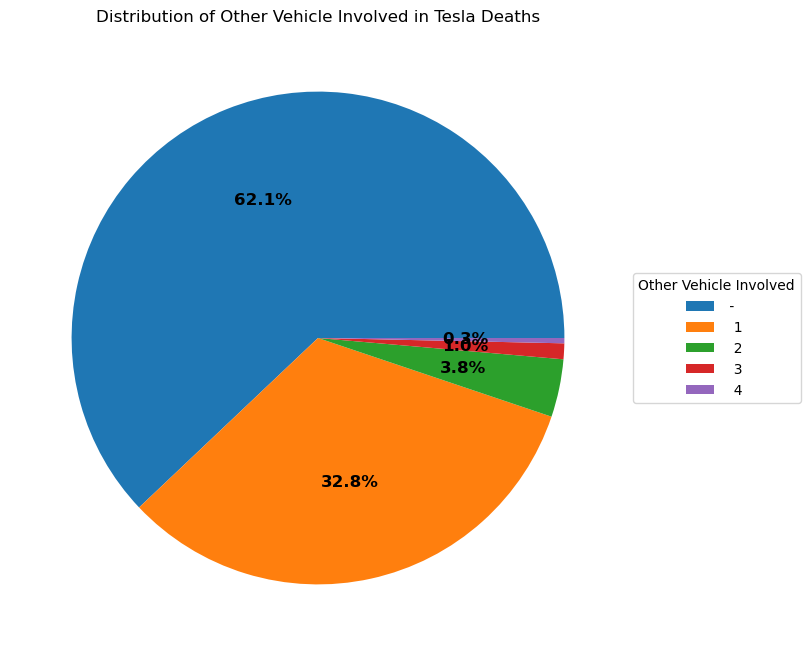

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/raw/Tesla_Deaths.csv')

df.drop(['Date', 'Year', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ', 
         ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '], axis=1, inplace=True)
df.drop([294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306], axis=0, inplace=True)

# Calculate the value counts of the Other vehicle column
other_vehicle_counts = df[' Other vehicle '].value_counts()

# Create a pie chart of the value counts
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(other_vehicle_counts.values, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.legend(wedges, other_vehicle_counts.index, title="Other Vehicle Involved", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.title("Distribution of Other Vehicle Involved in Tesla Deaths")
plt.show()